**This notebook demonstrates how to get paleo-coastlines from GPlates Web Service.**


#### Dependencies

- gplates-ws-proxy
- shapely
- cartopy
- matplotlib
- moviepy

    Use the following commands to create a running environment

    `conda create --name gplates-ws-example -c conda-forge cartopy matplotlib moviepy shapely jupyter requests`
    
    `conda activate gplates-ws-example`
    
    `pip install gplates-ws-proxy`
    
    You may use the environment.yml to create the conda env as well.

    `conda env create -f environment.yml `



In [1]:
from pathlib import Path
import json, os
import shapely
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon
from shapely.geometry import shape
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import gplates_proxy


def plot_paleo_map(paleo_age, show=True, save=False):
    #get coastlines
    coastlines=gplates_proxy.get_paleo_coastlines(paleo_age, format="shapely")
    

    # plot the map
    crs = ccrs.Orthographic(central_longitude=115, central_latitude=-34)
    #crs = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    
    fig = plt.figure(figsize=(12, 8), dpi=120, frameon=False)
    ax = plt.axes(projection=crs)
    ax.gridlines()
    ax.set_global()

    
    #plot coastlines
    shape_feature = ShapelyFeature(coastlines, ccrs.PlateCarree(), facecolor="lime", edgecolor='none', lw=1, zorder=1)
    ax.add_feature(shape_feature)

    
    plt.title(f"{paleo_age} Ma", loc='left', y=0.95)
    if show:
        plt.show()
        
    if save:
        Path("maps").mkdir(parents=True, exist_ok=True)
        fig.savefig(
            f"maps/coastlines_{paleo_age}_Ma.png",
            format="png",
            #bbox_inches="tight",
            dpi=96,
            transparent=True,
            #pad_inches=0
        )
        plt.close()
        

In [ ]:
plot_paleo_map(47, show=True, save=True)

In [ ]:
import time

for age in range(0,101,1):
    print(age)
    plot_paleo_map(age,save=True, show=False)
    time.sleep(1)

In [ ]:
%%capture --no-stdout

#pip install moviepy
#create the mp4 video
import moviepy.editor as mpy
from pathlib import Path

frame_list = [f"maps/coastlines_{age}_Ma.png" for age in range(0,101,1)]
#print(frame_list)
clip = mpy.ImageSequenceClip(frame_list, fps=4)
              
Path("videos").mkdir(parents=True, exist_ok=True)

clip.write_videofile( f'videos/coastlines.mp4',
                          codec="libx264",
                          #audio_codec='aac',
                          ffmpeg_params=[ "-s", "1152x768", "-pix_fmt", "yuv420p"]) #LOOK HERE!!!! give image size here(the numbers must divide by 2)
print('video has been created!')

In [ ]:
from IPython.display import Video

#display the mp4 video
Video(f'videos/coastlines.mp4',width=600, embed=True)

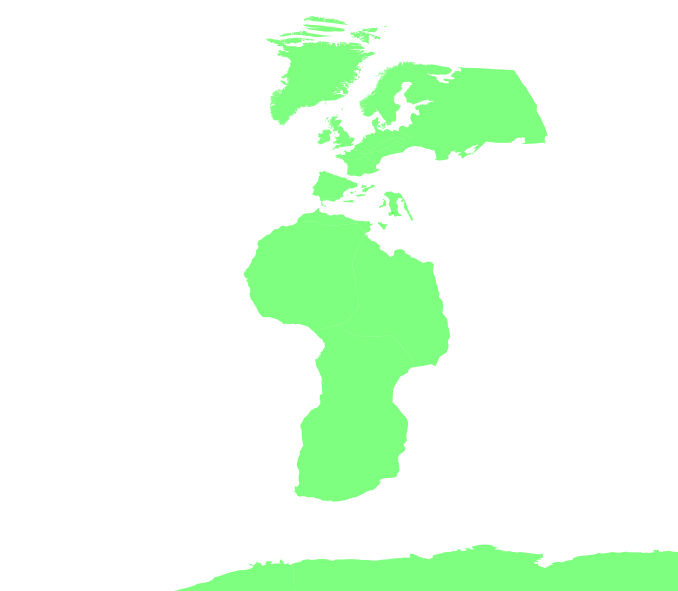

In [19]:
from IPython.display import Image, display
coastlines_png=gplates_proxy.get_paleo_coastlines(100, format="png", extent=(-90,85,-10,10), facecolor='lime')
display(Image(coastlines_png))